In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
import os

In [6]:
load_dotenv()

ACCESS_TOKEN = os.getenv('ACCESS_TOKEN')
API_VERSION = os.getenv('API_VERSION')

In [369]:
def get_group_members(group_id):
    members = []
    offset = 0
    count = 1000

    while True:
        response = requests.get('https://api.vk.com/method/groups.getMembers', params = {
            'group_id': group_id,
            'access_token': ACCESS_TOKEN,
            'v': API_VERSION,
            'count': count,
            'offset': offset,
        })

        if response.status_code != 200:
            print(f"Ошибка: запрос вернул статус {response.status_code}")
            print(response.text)
            break

        try:
            response_json = response.json()
        except requests.exceptions.JSONDecodeError:
            print("Ошибка: не удалось разобрать JSON")
            print(response.text)
            break

        members_data = response_json.get('response', {}).get('items', [])
        if not members_data:
            break

        members.extend(members_data)
        offset += count

    return members


def get_user_data(user_ids):
    user_data_list = []
    chunk_size = 100

    for i in range(0, len(user_ids), chunk_size):
        ids_chunk = user_ids[i:i + chunk_size]
        response = requests.get('https://api.vk.com/method/users.get', params = {
            'user_ids': ','.join(map(str, ids_chunk)),
            'fields': 'bdate',
            'access_token': ACCESS_TOKEN,
            'v': API_VERSION,
        })

        if response.status_code != 200:
            print(f"Ошибка: запрос вернул статус {response.status_code}")
            print(response.text)
            continue

        try:
            response_json = response.json()
        except requests.exceptions.JSONDecodeError:
            print("Ошибка: не удалось разобрать JSON")
            print(response.text)
            continue

        user_data_list.extend(response_json.get('response', []))

    return user_data_list


groups = list({'podslushanoxce', 'fanclubgoslinghse', 'hse_career', 'hse_overheard', 'hselibrary',
               'print_hse', 'extrahse', 'ba_hse', 'hsedsba', 'hse_gsb', 'irgshse'})
formatted_data = []

for group_id in groups:
    members = get_group_members(group_id)
    if members:
        users_data = get_user_data(members)

        for user in users_data:
            formatted_data.append({
                'first_name': user.get('first_name'),
                'last_name': user.get('last_name'),
                'profile_link': f"https://vk.com/id{user.get('id')}",
            })

df = pd.DataFrame(formatted_data)
df = df.drop_duplicates()
df

In [371]:
jewish_first_names = ['Aaron', 'Aba', 'Avi', 'Aviv', 'Avigdor', 'Avinoam', 'Aviram', 'Aviu',
                      'Avihai', 'Aviel', 'Avner', 'Avraham', 'Avshalom', 'Adam', 'Adi', 'Adir',
                      'Adiel', 'Azriel', 'Akiva', 'Alon', 'Ami', 'Amikam', 'Amir', 'Amiram', 'Amit',
                      'Amitai', 'Amichai', 'Amnon', 'Amos', 'Amram', 'Arik', 'Ariel', 'Arye',
                      'Arel', 'Asaf', 'Asi', 'Asher', 'Barak', 'Baruch', 'Beni', 'Benci', 'Benzion',
                      'Betzalel', 'Binyamin', 'Boaz', 'Gabi', 'Gabriel', 'Gad', 'Gadi', 'Guy',
                      'Gal', 'Gedalya', 'Gershon', 'Gefen', 'Gidi', 'Gidon', 'Gilad', 'Gili', 'Gil',
                      'Giora', 'Golan', 'David', 'Dan', 'Dani', 'Daniel', 'Dvir', 'Dekel', 'Dov',
                      'Dubi', 'Dodik', 'Doron', 'Dror', 'Dudu', 'Dudi', 'Zacharia', 'Zevulon',
                      'Ze’ev', 'Ziv', 'Zohar', 'Idan', 'Ido', 'Ilan', 'Immanuel', 'Itai', 'Itamar',
                      'Ito', 'Yehuda', 'Yedidya', 'Yekutiel', 'Yeoshua', 'Yerachmiel', 'Yirmiyahu',
                      'Yehezkel', 'Yechiel', 'Yeshayahu', 'Yigal', 'Yisrael', 'Yissachar', 'Yitzik',
                      'Yitzhak', 'Yitzhar', 'Yishai', 'Yoav', 'Yovel', 'Yonah', 'Yonatan', 'Yoni',
                      'Yosef', 'Yossi', 'Yotam', 'Yochai', 'Yochanan', 'Yoel', 'Katzir', 'Kobi',
                      'Levi', 'Lior', 'Liran', 'Liron', 'Malachi', 'Malkiel', 'Ma’oz', 'Ma’or',
                      'Matan', 'Mati', 'Matityahu', 'Meir', 'Menachem', 'Menashe', 'Meni',
                      'Meshulam', 'Micha', 'Michael', 'Moni', 'Mordechai', 'Moti', 'Moshe', 'Nadav',
                      'Naor', 'Narkis', 'Natan', 'Nati', 'Naftali', 'Nachman', 'Nachum', 'Nachshon',
                      'Neria', 'Netanel', 'Nechemya', 'Ne’eman', 'Nir', 'Nisan', 'Nissim', 'Nitzan',
                      'Noam', 'Noah', 'Nuriel', 'Oad', 'Ovadya', 'Oded', 'Oz', 'Omer', 'Omri', 'Or',
                      'Ori', 'Oren', 'Oron', 'Ofer', 'Ofir', 'Osher', 'Peretz', 'Pesach', 'Pini',
                      'Pinchas', 'Ra’anan', 'Raz', 'Razi', 'Raziel', 'Ram', 'Rami', 'Ran', 'Rani',
                      'Raphael', 'Rafi', 'Rachamim', 'Rachmiel', 'Reuven', 'Rechavam', 'Roi', 'Ron',
                      'Ronen', 'Roni', 'Rotem', 'Rubi', 'Sami', 'Sason', 'Sefi', 'Simcha', 'Tal',
                      'Tamir', 'Tomer', 'Tuvia', 'Uzi', 'Uziel', 'Uri', 'Uriel', 'Hagai', 'Chaim',
                      'Chanan', 'Chananiel', 'Chanoch', 'Chezi', 'Chizkiyahu', 'Tzadok', 'Tzachi',
                      'Tzvi', 'Tzvika', 'Tzion', 'Tzefanya', 'Shabtai', 'Shai', 'Shaiya', 'Shalom',
                      'Shamai', 'Sharon', 'Shaul', 'Shachar', 'Shaltiel', 'Shevach', 'Shimi',
                      'Shimon', 'Shimshon', 'Shlomi', 'Shlomo', 'Shmarya', 'Shmuel', 'Shmulik',
                      'Shraga', 'Shuki', 'Eden', 'Edna', 'Egoz', 'Ezer', 'Ezra', 'Eitan', 'Eli',
                      'Elimelech', 'Elisha', 'Eliezer', 'Eliyahu', 'Elazar', 'Eldad', 'Elkana',
                      'Elhanan', 'Eliakim', 'Eliyashiv', 'Eran', 'Erez', 'Efi', 'Efraim', 'Ehud',
                      'Eyal', 'Yuval', 'Yaakov', 'Yair', 'Yakir', 'Yanai', 'Yaniv', 'Yarden',
                      'Yaron', 'Aviva', 'Avivit', 'Avigail', 'Avital', 'Avia', 'Ada', 'Adar',
                      'Adas', 'Adasa', 'Ayelet', 'Aliza', 'Alona', 'Amira', 'Anat', 'Ariela',
                      'Ayala', 'Batya', 'Bilha', 'Bina', 'Bracha', 'Brurya', 'Varda', 'Vardit',
                      'Vered', 'Gabriela', 'Gali', 'Galit', 'Galia', 'Geula', 'Gila', 'Dalia',
                      'Dana', 'Daniela', 'Dasi', 'Dafna', 'Dvorah', 'Dikla', 'Dina', 'Dorit',
                      'Drora', 'Zahava', 'Ziva', 'Ilana', 'Ilanit', 'Iris', 'Irit', 'Judith',
                      'Yemima', 'Yisraela', 'Yifat', 'Yona', 'Yonit', 'Yocheved', 'Yocha', 'Kalani',
                      'Carmela', 'Carmit', 'Keren', 'Kineret', 'Kochava', 'Leah', 'Levana',
                      'Lilach', 'Limor', 'Liora', 'Liran', 'Liron', 'Mazal', 'Maya', 'Mali',
                      'Malka', 'Margalit', 'Masua', 'Meira', 'Meirav', 'Meital', 'Menora',
                      'Menucha', 'Mira', 'Miriam', 'Michal', 'Mor', 'Moran', 'Moria', 'Naama',
                      'Nava', 'Naomi', 'Neta', 'Nechama', 'Nili', 'Nira', 'Nirit', 'Noa', 'Noga',
                      'Nurit', 'Ora', 'Oranit', 'Orli', 'Orna', 'Osnat', 'Ofira', 'Ofra', 'Pnina',
                      'Rakefet', 'Rachel', 'Revital', 'Reut', 'Rivka', 'Riki', 'Rina', 'Ronit',
                      'Rotem', 'Ruth', 'Shani', 'Shanit', 'Sharon', 'Shachar', 'Shir', 'Shira',
                      'Shiri', 'Shirley', 'Shifra', 'Shlomit', 'Shosh', 'Shoshana', 'Shula',
                      'Shulamit', 'Shuli', 'Tehila', 'Te’ena', 'Tova', 'Tova', 'Talia', 'Tikva',
                      'Hava', 'Chavatzelet', 'Chaya', 'Hagar', 'Hagit', 'Chana', 'Chemdat', 'Hen',
                      'Hila', 'Tzameret', 'Tzvia', 'Tziyonah', 'Tzila', 'Tzipi', 'Tzipora', 'Yaara',
                      'Yamit', 'Yarden', 'Yasmin', 'Yael']

with open('jewish_last_names.txt') as f:
    jewish_last_name = f.read().split(', ')

for i in range(len(jewish_last_name)):
    jewish_last_name[i] = jewish_last_name[i].lower()

for i in range(len(jewish_first_names)):
    jewish_first_names[i] = jewish_first_names[i].lower()

jewish_last_name_patterns = [
    "gold", "silver", "miller", "cohen", "levi", "schneider", "wein", "stein", "baum",
    "witz", "vitz", "sky", "ski", "man", "feld", "thal", "son", "ben", "bar", "vich", "berg",
    "rosen", "blumen", "wolf", "fisch", "hirsch", "adler", "mosk", "solomon", "jacob", "david",
    "isaac", "abrams", "itz", "levin", "katz", "hersh", "shapiro"
]

In [372]:
def is_jewish_last_name(last_name):
    last_name_lower = last_name.lower()
    for pattern in jewish_last_name_patterns:
        if last_name_lower.endswith(pattern):
            return True
    return False


def is_jewish(first_name, last_name):
    first_name_lower = str(first_name).lower()
    last_name_lower = str(last_name).lower()

    if first_name_lower in jewish_first_names and (
            last_name_lower in jewish_last_name or is_jewish_last_name(last_name_lower)):
        return 'Имя и Фамилия'

    if first_name_lower in jewish_first_names:
        return 'Имя'

    if last_name_lower in jewish_last_name or is_jewish_last_name(last_name_lower):
        return 'Фамилия'

    return None

In [373]:
df['Совпадает'] = df.apply(lambda row: is_jewish(row['first_name'], row['last_name']), axis = 1)
df = df[df['Совпадает'].notnull()]
df

,first_name,last_name,profile_link,Совпадает
37,Konstantin,Gortsevsky,https://vk.com/id2884346,Фамилия
49,Marina,Raysfeld,https://vk.com/id5723509,Фамилия
76,Marat,Granovsky,https://vk.com/id16940581,Фамилия
137,Dana,Dramova,https://vk.com/id43316026,Имя
142,Nikita,Ganevich,https://vk.com/id45599875,Фамилия
...,...,...,...,...
35446,Tomer,Beylinson,https://vk.com/id22363512,Имя и Фамилия
35502,Andrey,Skaletsky,https://vk.com/id22708026,Фамилия
35546,Dasha,Milkevich,https://vk.com/id23018102,Фамилия
35550,Anna,Pavich,https://vk.com/id23035299,Фамилия


In [374]:
df['Совпадает'].value_counts()

Совпадает
Фамилия          1049
Имя               181
Имя и Фамилия      21
Name: count, dtype: int64

In [375]:
df.to_excel('Список Евреев согласно коду.xlsx', index = False)

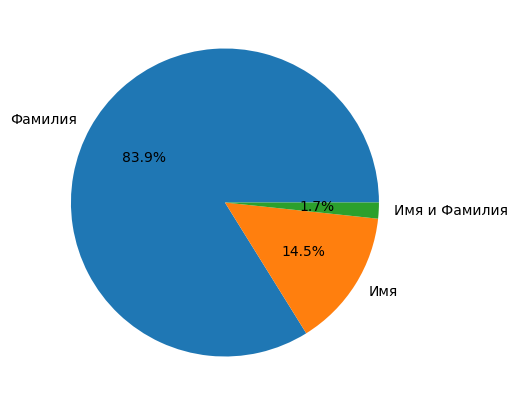

In [376]:
plt.figure(figsize = (10, 5))
plt.pie(df['Совпадает'].value_counts(), labels = df['Совпадает'].value_counts().index,
        autopct = '%1.1f%%')
plt.show()